
# Tech Portfolio Analysis_V2


##### Disclosure: Statistical data within this project are thoroughly researched and believed to be accurate using Yahoo Finance Data Package. However, discrepancies can occur with the data provided.  As an investor you should conduct your own research and recheck  for any missing data before making any final decisions regarding buying or selling any stocks. Past performances of stocks mentioned in this case study are not a guarantee of future performances.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
Tech_Stocks = pd.read_csv("Tech_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]

Gathering stock data from the Market Bottom of March 23 2020 to present

In [3]:
Tech_Stocks = Tech_Stocks.loc["2020-3-23":"2020-8-21"]
Tech_Stocks.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA
Date,,,,,,,,,
2020-08-14,459.63,3148.02,261.24,1504.63,208.40,462.56,113.74,987.90,1650.71
2020-08-17,458.43,3182.41,261.16,1516.24,209.77,493.48,112.18,1012.96,1835.64
2020-08-18,462.25,3312.49,262.34,1555.78,210.98,490.43,112.03,1024.71,1887.09
2020-08-19,462.83,3260.48,262.59,1544.61,209.70,485.54,111.04,1009.11,1878.53
2020-08-20,473.10,3297.37,269.01,1576.25,214.58,485.64,110.66,1039.62,2001.83


This function is used to calculate a summary of daily returns and to create a column for Returns and Risks of the stocks mentioned in the portfolio:

In [4]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*125
    summary.Risk = summary.Risk * np.sqrt(125)
    return summary

In [5]:
ret = Tech_Stocks.pct_change().dropna()
ret.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA
Date,,,,,,,,,
2020-08-14,-0.00,-0.00,-0.00,-0.01,0.00,0.01,0.00,-0.01,0.02
2020-08-17,-0.00,0.01,-0.00,0.01,0.01,0.07,-0.01,0.03,0.11
2020-08-18,0.01,0.04,0.00,0.03,0.01,-0.01,-0.00,0.01,0.03
2020-08-19,0.00,-0.02,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.00
2020-08-20,0.02,0.01,0.02,0.02,0.02,0.00,-0.00,0.03,0.07


In [6]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.93,0.28
AMZN,0.69,0.26
FB,0.76,0.31
GOOGL,0.51,0.26
MSFT,0.59,0.27
NVDA,1.05,0.37
QCOM,0.75,0.35
SHOP,1.33,0.48
TSLA,1.98,0.56


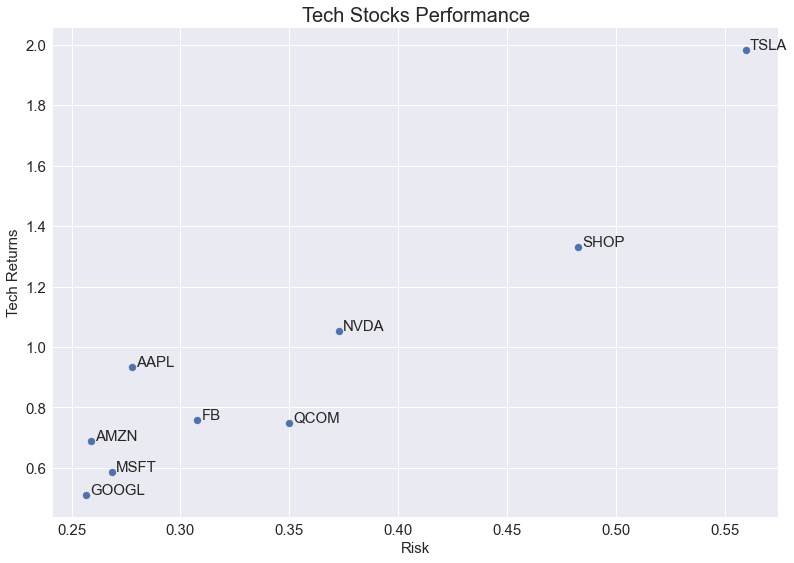

In [7]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Risk", fontsize = 15)
plt.ylabel("Tech Returns", fontsize = 15)
plt.title("Tech Stocks Performance", fontsize = 20)
plt.show()

## Tech Stocks Analysis With The Sharpe Ratio

Sharpe Ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Since the Portfolio is from March 23 2020 to Aug 20 2020, we're going to be using the 3 month government bond as the Risk Free Rate, which is at 0.09% during the time of this case study when I checked the treasury yield, The treasury yields are subjected to change. https://www.bloomberg.com/markets/rates-bonds/government-bonds/us use this website to track the treasury yields.

Risk Free Rate:

In theory, the risk-free rate is the minimum return an investor expects for any investment because he will not accept additional risk unless the potential rate of return is greater than the risk-free rate. In practice, however, the risk-free rate does not exist because even the safest investments carry a very small amount of risk. Thus, the interest rate on a three-month U.S. Treasury bill is often used as the risk-free rate for U.S.-based investors.
https://www.investopedia.com/terms/r/risk-freerate.asp

In [8]:
risk_free_return = 0.0009
risk_free_risk = 0

In [9]:
rf = [risk_free_return, risk_free_risk]
rf

[0.0009, 0]

In [10]:
summary["Sharpe Ratio"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe Ratio
AAPL,0.93,0.28,3.36
AMZN,0.69,0.26,2.66
FB,0.76,0.31,2.46
GOOGL,0.51,0.26,1.99
MSFT,0.59,0.27,2.18
NVDA,1.05,0.37,2.83
QCOM,0.75,0.35,2.14
SHOP,1.33,0.48,2.76
TSLA,1.98,0.56,3.54


Stock Sharpe Ratio Analysis: Stocks with positive sharpe ratios, we're expecting postive performances. Stocks with negative sharpe ratios we're expecting negative performances

## Portfolio Allocations Risk / Return
Asset allocation is an investment strategy that aims to balance risk and reward by apportioning a portfolio's assets according to an individual's goals, risk tolerance, and investment horizon. 

### Portfolio Return

In [11]:
Tech_Stocks.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA
Date,,,,,,,,,
2020-08-14,459.63,3148.02,261.24,1504.63,208.40,462.56,113.74,987.90,1650.71
2020-08-17,458.43,3182.41,261.16,1516.24,209.77,493.48,112.18,1012.96,1835.64
2020-08-18,462.25,3312.49,262.34,1555.78,210.98,490.43,112.03,1024.71,1887.09
2020-08-19,462.83,3260.48,262.59,1544.61,209.70,485.54,111.04,1009.11,1878.53
2020-08-20,473.10,3297.37,269.01,1576.25,214.58,485.64,110.66,1039.62,2001.83


In [12]:
returns = (Tech_Stocks / Tech_Stocks.shift(1)) - 1
returns.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA
Date,,,,,,,,,
2020-08-14,-0.00,-0.00,-0.00,-0.01,0.00,0.01,0.00,-0.01,0.02
2020-08-17,-0.00,0.01,-0.00,0.01,0.01,0.07,-0.01,0.03,0.11
2020-08-18,0.01,0.04,0.00,0.03,0.01,-0.01,-0.00,0.01,0.03
2020-08-19,0.00,-0.02,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.00
2020-08-20,0.02,0.01,0.02,0.02,0.02,0.00,-0.00,0.03,0.07


Assuming we have an equally weighted tech portfolio

In [13]:
weights = np.array([0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11])

In [14]:
allo_returns = returns.mean() * 125
allo_returns

AAPL    0.93
AMZN    0.69
FB      0.76
GOOGL   0.51
MSFT    0.59
NVDA    1.05
QCOM    0.75
SHOP    1.33
TSLA    1.98
dtype: float64

In [15]:
np.dot(allo_returns, weights)

0.9457795327831386

In [16]:
pfolio_1 = str(round(np.dot(allo_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

94.57799999999999 %


### Portfolio Risk

In [17]:
Port_returns = np.log(Tech_Stocks / Tech_Stocks.shift(1) )

In [18]:
Port_returns[['AAPL', 'AMZN', 'FB', 'GOOGL', 'MSFT', 'NVDA', 'QCOM', 'SHOP', 'TSLA']].mean() * 125

AAPL    0.89
AMZN    0.65
FB      0.71
GOOGL   0.48
MSFT    0.55
NVDA    0.98
QCOM    0.69
SHOP    1.21
TSLA    1.82
dtype: float64

In [19]:
Port_returns[['AAPL', 'AMZN', 'FB', 'GOOGL', 'MSFT', 'NVDA', 'QCOM', 'SHOP', 'TSLA']].std() * 125 ** 0.5

AAPL    0.27
AMZN    0.26
FB      0.30
GOOGL   0.25
MSFT    0.26
NVDA    0.36
QCOM    0.34
SHOP    0.47
TSLA    0.55
dtype: float64

Covariance measures the directional relationship between the returns on two assets. A positive covariance means that asset returns move together while a negative covariance means they move inversely.

In [20]:
cov_matrix = Port_returns.cov()

In [21]:
cov_matrix_a = Port_returns.cov() * 125

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

In [22]:
corr_matrix = Port_returns.corr()

In [23]:
weights = np.array([0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11])

Portfolio Variance is a measure of the dispersion of returns of a portfolio. It is the aggregate of the actual returns of a given portfolio over a set period of time. Modern portfolio theory (MPT) states that portfolio variance can be reduced by selecting securities with low or negative correlations in which to invest, such as stocks and bonds.

In [24]:
pfolio_var = np.dot(weights.T, np.dot(Port_returns.cov() * 125, weights))
pfolio_var

0.06812392476454528

Portfolio Volatility is a measure of how wildly the total value of all the stocks in that portfolio appreciates or declines.

In [25]:
pfolio_vol = (np.dot(weights.T, np.dot(Port_returns.cov() * 125, weights))) ** 0.5
pfolio_vol

0.26100560293707353

In [26]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

26.101000000000003 %


## Including the Market Portfolio (S&P 500 Index)

A market portfolio is a theoretical bundle of investments that includes every type of asset available in the investment universe, with each asset weighted in proportion to its total presence in the market. The expected return of a market portfolio is identical to the expected return of the market as a whole.

A market portfolio, by nature of being completely diversified, is subject only to systematic risk, or risk that affects the market as a whole, and not to unsystematic risk, which is the risk inherent to a particular asset class. In this case study we will be using the S&P 500 Index as the Market Portfolio which will also serve as a benchmark. https://www.investopedia.com

In [27]:
Tech_Stocks = pd.read_csv("Tech_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500_Index =  pd.read_csv("SP500.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

In [28]:
Tech_Stocks = Tech_Stocks.loc["2020-3-23":"2020-8-21"]
SP500_Index = SP500_Index.loc["2020-3-23":"2020-8-21"]

In [29]:
Tech_Stocks["MP"] = SP500_Index["Adj Close"]

In [30]:
ret = Tech_Stocks.pct_change().dropna() 
# ret, when inputting "ret" it'll bring up a list of the daily returns

In [31]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*125
    summary.Risk = summary.Risk * np.sqrt(125)
    return summary

In [32]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.93,0.28
AMZN,0.69,0.26
FB,0.76,0.31
GOOGL,0.51,0.26
MSFT,0.59,0.27
NVDA,1.05,0.37
QCOM,0.75,0.35
SHOP,1.33,0.48
TSLA,1.98,0.56
MP,0.52,0.22


In [33]:
risk_free_return = 0.0009
risk_free_risk = 0

In [34]:
rf = [risk_free_return, risk_free_risk]
rf

[0.0009, 0]

In [35]:
summary["Sharpe Ratio"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe Ratio
AAPL,0.93,0.28,3.36
AMZN,0.69,0.26,2.66
FB,0.76,0.31,2.46
GOOGL,0.51,0.26,1.99
MSFT,0.59,0.27,2.18
NVDA,1.05,0.37,2.83
QCOM,0.75,0.35,2.14
SHOP,1.33,0.48,2.76
TSLA,1.98,0.56,3.54
MP,0.52,0.22,2.32


Notice that the Market Porfolo has a Positive sharpe ratio, this generally means we're expecting positive performance.

## Systematic and Unsystematic Risk  Including the Market Portfolio

Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.

Variance is used to compare the relative performance of each asset in a portfolio:

In [36]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe Ratio,TotalRisk_var
AAPL,0.93,0.28,3.36,0.08
AMZN,0.69,0.26,2.66,0.07
FB,0.76,0.31,2.46,0.09
GOOGL,0.51,0.26,1.99,0.07
MSFT,0.59,0.27,2.18,0.07
NVDA,1.05,0.37,2.83,0.14
QCOM,0.75,0.35,2.14,0.12
SHOP,1.33,0.48,2.76,0.23
TSLA,1.98,0.56,3.54,0.31
MP,0.52,0.22,2.32,0.05


In statistics, covariance is a metric used to measure how one random variable moves in relation to another random variable. In investment, covariance of returns measures how the rate of return on one asset varies in relation to the rate of return on other assets or a portfolio.

In [37]:
COV = ret.cov()*125
# COV, if we add "COV" it'll create a long chart

In [38]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [39]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe Ratio,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,0.93,0.28,3.36,0.08,0.05,0.03
AMZN,0.69,0.26,2.66,0.07,0.03,0.04
FB,0.76,0.31,2.46,0.09,0.05,0.05
GOOGL,0.51,0.26,1.99,0.07,0.05,0.02
MSFT,0.59,0.27,2.18,0.07,0.05,0.02
NVDA,1.05,0.37,2.83,0.14,0.06,0.08
QCOM,0.75,0.35,2.14,0.12,0.05,0.07
SHOP,1.33,0.48,2.76,0.23,0.05,0.19
TSLA,1.98,0.56,3.54,0.31,0.06,0.26
MP,0.52,0.22,2.32,0.05,0.05,-0.00


### Systematic and Unsystematic risk of stocks including the Market Portfolio (MP = S&P500 Index):

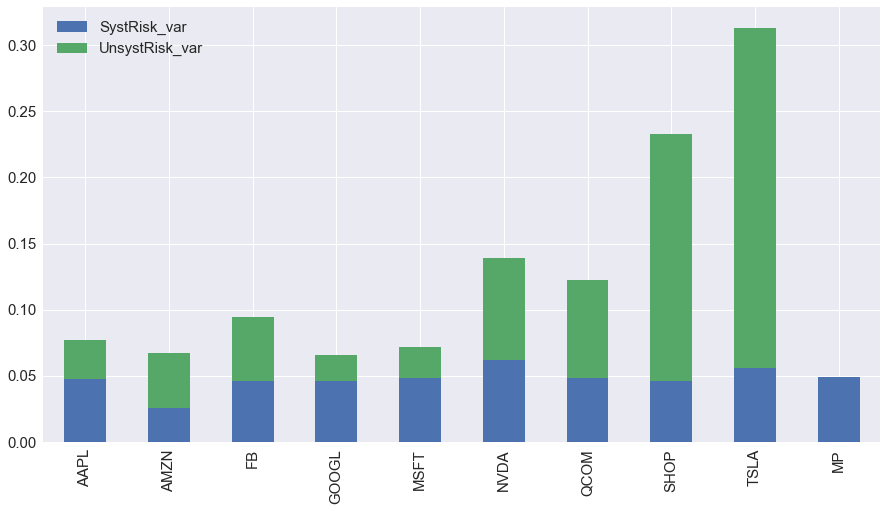

In [40]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### Determining the beta of the stocks in the portfolio compared to the Market Portfolio (S&P 500 Index):

Beta is a measure of the volatility (Risk), or systematic risk, of a security or portfolio, in comparison to the market as a whole.

In [41]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary

,Return,Risk,Sharpe Ratio,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AAPL,0.93,0.28,3.36,0.08,0.05,0.03,0.96
AMZN,0.69,0.26,2.66,0.07,0.03,0.04,0.53
FB,0.76,0.31,2.46,0.09,0.05,0.05,0.94
GOOGL,0.51,0.26,1.99,0.07,0.05,0.02,0.93
MSFT,0.59,0.27,2.18,0.07,0.05,0.02,0.98
NVDA,1.05,0.37,2.83,0.14,0.06,0.08,1.25
QCOM,0.75,0.35,2.14,0.12,0.05,0.07,0.97
SHOP,1.33,0.48,2.76,0.23,0.05,0.19,0.93
TSLA,1.98,0.56,3.54,0.31,0.06,0.26,1.13
MP,0.52,0.22,2.32,0.05,0.05,-0.00,1.00


## Determining The Security Market Line For Tech Stocks

The security market line is an investment evaluation tool derived from the CAPM—a model that describes risk-return relationship for securities—and is based on the assumption that investors need to be compensated for both the time value of money (TVM) and the corresponding level of risk associated with any investment, referred to as the risk premium.

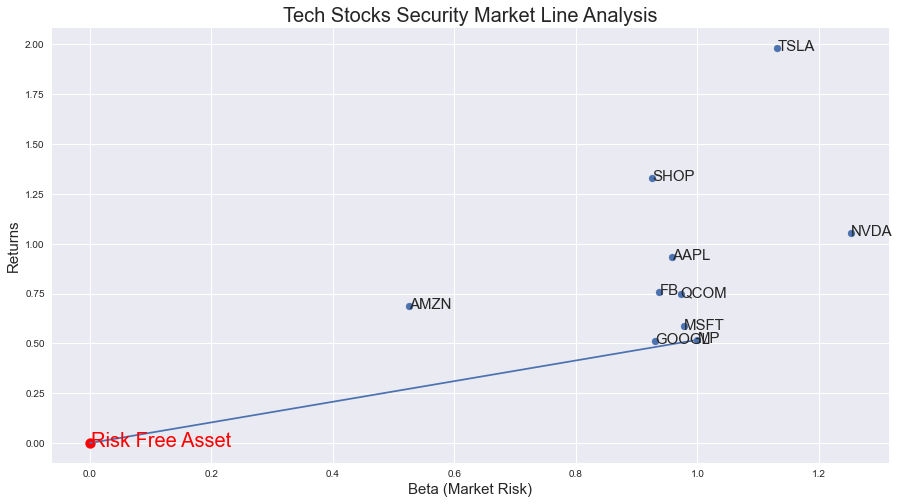

In [42]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "Red")
plt.xlabel("Beta (Market Risk)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Tech Stocks Security Market Line Analysis", fontsize = 20)
plt.show()

Security Market Line Analysis: Stocks that fall below the SML is an indictor that they are underperforming the market. Meanwhile stocks above the SML indicate that they are outperforming the market. Stocks that are underperforming the market also have negative alpha values.

Stocks with the beta above 1, means that they get largely affected by market condidtions in a postive and a negative way due to systematic risk. If the S&P 500 were to drop around 5%, these stocks would be likely to drop towards 8 to 10% in a day and if the S&P500 would of rallyed 5% then those stocks would gained 8 to 10% in a day. In other words high beta stock tend to have more risk, with greater risk comes greater potential reward. 

### Including the Capital Asset Pricing Model and Alpha of the stocks with the Market Portfolio

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

"Alpha" (the Greek letter α) is a term used in investing to describe a strategy's ability to beat the market, or it's "edge." Alpha is thus also often referred to as “excess return” or “abnormal rate of return,” which refers to the idea that markets are efficient, and so there is no way to systematically earn returns that exceed the broad market as a whole. Alpha is often used in conjunction with beta (the Greek letter β) , which measures the broad market's overall volatility or risk, known as systematic market risk

In [43]:
summary["CAPM_Ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [44]:
summary["Alpha"] = summary.Return - summary.CAPM_Ret
summary

,Return,Risk,Sharpe Ratio,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,CAPM_Ret,Alpha
AAPL,0.93,0.28,3.36,0.08,0.05,0.03,0.96,0.50,0.44
AMZN,0.69,0.26,2.66,0.07,0.03,0.04,0.53,0.27,0.42
FB,0.76,0.31,2.46,0.09,0.05,0.05,0.94,0.49,0.27
GOOGL,0.51,0.26,1.99,0.07,0.05,0.02,0.93,0.48,0.03
MSFT,0.59,0.27,2.18,0.07,0.05,0.02,0.98,0.51,0.08
NVDA,1.05,0.37,2.83,0.14,0.06,0.08,1.25,0.65,0.41
QCOM,0.75,0.35,2.14,0.12,0.05,0.07,0.97,0.50,0.25
SHOP,1.33,0.48,2.76,0.23,0.05,0.19,0.93,0.48,0.85
TSLA,1.98,0.56,3.54,0.31,0.06,0.26,1.13,0.59,1.40
MP,0.52,0.22,2.32,0.05,0.05,-0.00,1.00,0.52,0.00


CAPM Analysis of Equities: Since we know that the CAPM is used for determining expected returns on stocks, we can notice that each stock is expected to reach positve returns, We can also notice that stocks with the highest betas are expected to have higher returns. This could of course change do to systematic condidtons.  

Alpha Analysis of Equities: Understanding that Alpha is used to determine whether or not a stock would beat the overall market. We can notice that stocks in the Portfolio that have a chance of not beating the over all market are the stocks below the Security Market Line which have a negative alpha value.

# Portfolio Weighted Index (Portfolio) 

A price-weighted index is an index in which the member companies are weighted in proportion to their price per share, rather than by number of shares outstanding, market capitalization or other factors.

In [45]:
Tech_Stocks = pd.read_csv("Tech_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Close"]

In [46]:
Tech_Stocks.tail().dropna()

,AAPL,AMZN,FB,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA
Date,,,,,,,,,
2020-08-14,459.63,3148.02,261.24,1504.63,208.90,462.56,113.74,987.90,1650.71
2020-08-17,458.43,3182.41,261.16,1516.24,210.28,493.48,112.18,1012.96,1835.64
2020-08-18,462.25,3312.49,262.34,1555.78,211.49,490.43,112.03,1024.71,1887.09
2020-08-19,462.83,3260.48,262.59,1544.61,209.70,485.54,111.04,1009.11,1878.53
2020-08-20,473.10,3297.37,269.01,1576.25,214.58,485.64,110.66,1039.62,2001.83


The Purpose of normalzing the data to 100 is to give a better comparison of the performance of each stock in the portfolio. Normalizing the data to a value of 100 in our situations reprents $100 in each stock

In [47]:
norm = Tech_Stocks.div(Tech_Stocks.iloc[0]).mul(100)
norm

,AAPL,AMZN,FB,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA
Date,,,,,,,,,
2020-03-23,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2020-03-24,110.03,101.96,108.70,107.20,109.09,117.16,104.69,114.55,116.28
2020-03-25,109.43,99.11,105.48,104.51,108.05,115.48,100.88,118.97,124.17
2020-03-26,115.18,102.77,110.29,110.32,114.80,120.95,110.32,119.19,121.61
2020-03-27,110.42,99.86,105.87,105.32,110.09,118.83,106.49,112.32,118.44
...,...,...,...,...,...,...,...,...,...
2020-08-14,204.85,165.44,176.39,142.74,153.63,217.48,181.90,263.17,380.09
2020-08-17,204.32,167.25,176.34,143.84,154.64,232.02,179.40,269.84,422.68
2020-08-18,206.02,174.08,177.14,147.59,155.53,230.58,179.16,272.97,434.52


In [48]:
norm['Price Weighted Portfolio'] = Tech_Stocks.sum(axis =1).div(Tech_Stocks.sum(axis =1)[0]).mul(100)

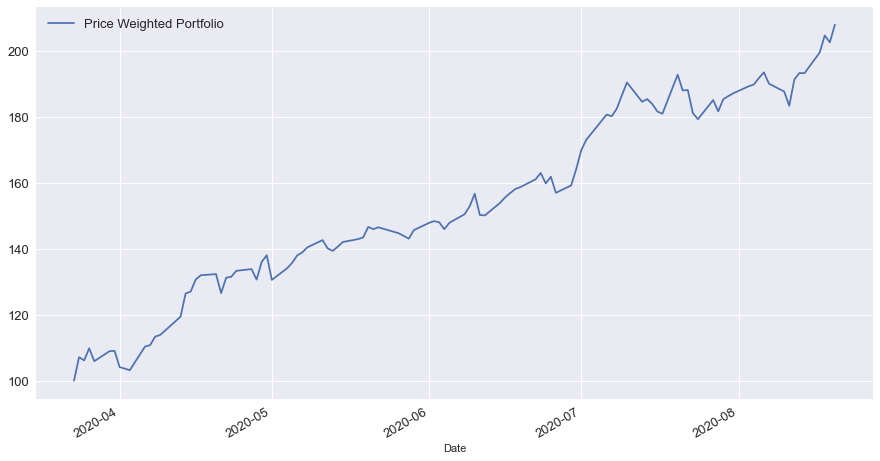

In [49]:
norm.loc[:, ['Price Weighted Portfolio']].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Equally Weighted Index (Portfolio)
An equal-weighted index is a stock market index – comprised of a group of publicly traded companies. – that invests an equal amount of money in the stock of each company that makes up the index.

In [50]:
ret = Tech_Stocks.pct_change().dropna()
ret.head()

,AAPL,AMZN,FB,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA
Date,,,,,,,,,
2020-03-24,0.10,0.02,0.09,0.07,0.09,0.17,0.05,0.15,0.16
2020-03-25,-0.01,-0.03,-0.03,-0.03,-0.01,-0.01,-0.04,0.04,0.07
2020-03-26,0.05,0.04,0.05,0.06,0.06,0.05,0.09,0.00,-0.02
2020-03-27,-0.04,-0.03,-0.04,-0.05,-0.04,-0.02,-0.03,-0.06,-0.03
2020-03-30,0.03,0.03,0.06,0.03,0.07,0.05,0.04,0.02,-0.02


In [51]:
ret['Mean_ret'] = ret.mean(axis = 1)
ret.head()

,AAPL,AMZN,FB,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA,Mean_ret
Date,,,,,,,,,,
2020-03-24,0.10,0.02,0.09,0.07,0.09,0.17,0.05,0.15,0.16,0.10
2020-03-25,-0.01,-0.03,-0.03,-0.03,-0.01,-0.01,-0.04,0.04,0.07,-0.00
2020-03-26,0.05,0.04,0.05,0.06,0.06,0.05,0.09,0.00,-0.02,0.04
2020-03-27,-0.04,-0.03,-0.04,-0.05,-0.04,-0.02,-0.03,-0.06,-0.03,-0.04
2020-03-30,0.03,0.03,0.06,0.03,0.07,0.05,0.04,0.02,-0.02,0.03


In [52]:
norm['Equally Weighted Portfolio'] = 100
norm.head()

,AAPL,AMZN,FB,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA,Price Weighted Portfolio,Equally Weighted Portfolio
Date,,,,,,,,,,,
2020-03-23,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100
2020-03-24,110.03,101.96,108.70,107.20,109.09,117.16,104.69,114.55,116.28,107.16,100
2020-03-25,109.43,99.11,105.48,104.51,108.05,115.48,100.88,118.97,124.17,106.16,100
2020-03-26,115.18,102.77,110.29,110.32,114.80,120.95,110.32,119.19,121.61,109.84,100
2020-03-27,110.42,99.86,105.87,105.32,110.09,118.83,106.49,112.32,118.44,105.92,100


In [53]:
norm.iloc[1:, -1] = ret.Mean_ret.add(1).cumprod().mul(100)
norm

,AAPL,AMZN,FB,GOOGL,MSFT,NVDA,QCOM,SHOP,TSLA,Price Weighted Portfolio,Equally Weighted Portfolio
Date,,,,,,,,,,,
2020-03-23,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2020-03-24,110.03,101.96,108.70,107.20,109.09,117.16,104.69,114.55,116.28,107.16,109.96
2020-03-25,109.43,99.11,105.48,104.51,108.05,115.48,100.88,118.97,124.17,106.16,109.45
2020-03-26,115.18,102.77,110.29,110.32,114.80,120.95,110.32,119.19,121.61,109.84,114.01
2020-03-27,110.42,99.86,105.87,105.32,110.09,118.83,106.49,112.32,118.44,105.92,109.81
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-14,204.85,165.44,176.39,142.74,153.63,217.48,181.90,263.17,380.09,193.33,205.05
2020-08-17,204.32,167.25,176.34,143.84,154.64,232.02,179.40,269.84,422.68,199.61,209.90
2020-08-18,206.02,174.08,177.14,147.59,155.53,230.58,179.16,272.97,434.52,204.79,212.65


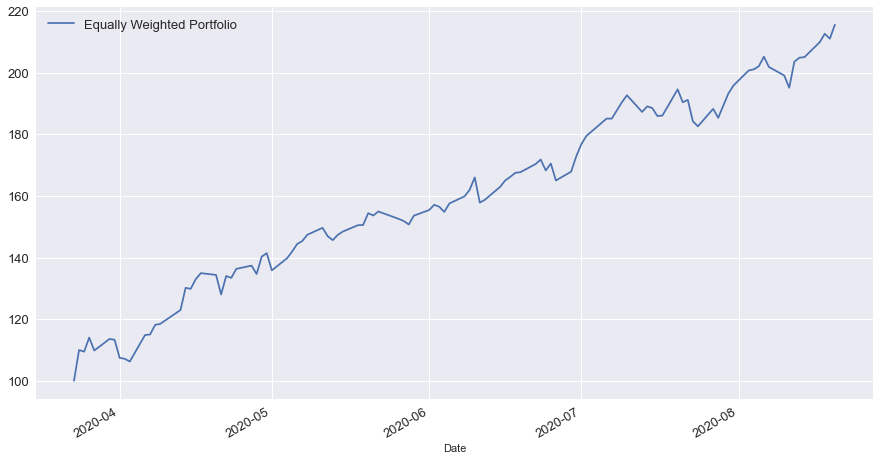

In [54]:
norm.loc[:, ['Equally Weighted Portfolio']].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

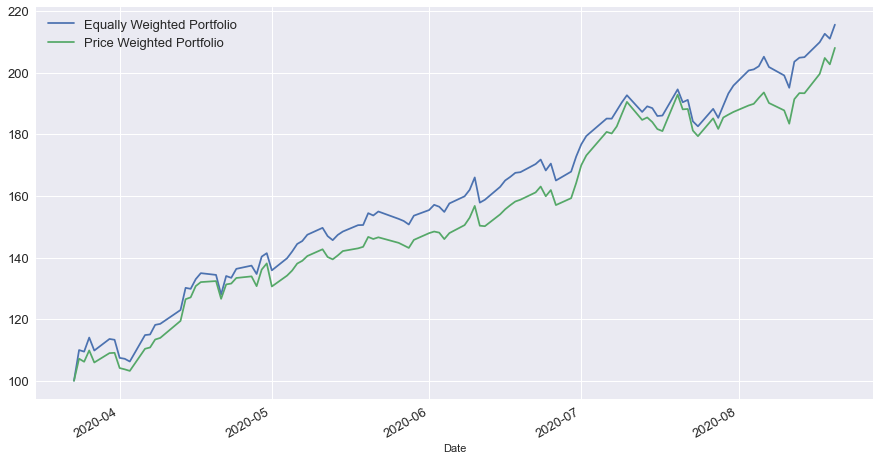

In [55]:
norm.loc[:, ['Equally Weighted Portfolio', 'Price Weighted Portfolio']].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

# Conclusion
from this data we can tell that the equally weighted portfolio has a similar correlation with the price weighted portfolio, however the EWP outperforms the PWP